In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from collections import Counter 
from keras import models, regularizers, layers, optimizers, losses, metrics
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils, to_categorical
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Conv2D, MaxPooling2D, Flatten

C:\Users\Wei Tan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
labeled_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
labeled_df.shape

(42000, 785)

In [3]:
labeled_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
labels = labeled_df["label"]
pixels = labeled_df.drop(columns="label")

In [5]:
pixels.shape

(42000, 784)

### Split into train and validation set for cv

In [6]:
train_X, valid_X, train_y, valid_y = train_test_split(pixels, labels, test_size=0.1, random_state=2019)
train_X.shape, valid_X.shape

((37800, 784), (4200, 784))

### Observe samples

In [7]:
train_disp = np.array(train_X).reshape(37800, 28, 28)
valid_disp = np.array(valid_X).reshape(4200, 28, 28)

6


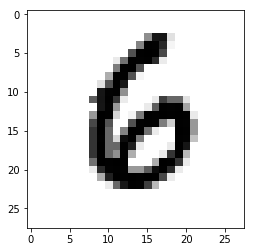

In [8]:
select_idx = 0
print(train_y.iloc[select_idx])
plt.imshow(train_disp[select_idx], cmap="binary")

4


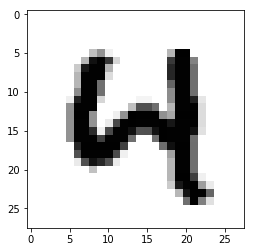

In [9]:
select_idx = 0
print(valid_y.iloc[select_idx])
plt.imshow(valid_disp[select_idx], cmap="binary")

In [10]:
Counter(train_y)

Counter({6: 3730,
         2: 3780,
         9: 3779,
         8: 3606,
         3: 3912,
         7: 3949,
         1: 4256,
         5: 3401,
         4: 3669,
         0: 3718})

## Process pixels and labels for Kera feed
### 1 Normalize pixels

In [11]:
train_disp.min(), train_disp.max()

(0, 255)

In [12]:
train_X = train_X / 255.
valid_X = valid_X / 255.

### 2 Convert labels to one hot vector

In [13]:
train_y = keras.utils.to_categorical(train_y) 
valid_y = keras.utils.to_categorical(valid_y) 
train_y.shape, valid_y.shape

((37800, 10), (4200, 10))

### 3 Reshape 

In [14]:
train_disp = np.array(train_disp).reshape(37800, 28, 28, 1)
valid_disp = np.array(valid_disp).reshape(4200, 28, 28, 1)

## Keras model

### Without data augmentation

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy, optimizer='adam', metrics=['accuracy'])

history1 = model.fit(train_disp, train_y,  validation_data = (valid_disp, valid_y), batch_size=128, epochs=25, verbose=1)

Train on 37800 samples, validate on 4200 samples
Epoch 1/25
37800/37800 [==============================] - 160s 4ms/step - loss: 6.8133 - acc: 0.5586 - val_loss: 0.2356 - val_acc: 0.9274
Epoch 2/25
37800/37800 [==============================] - 154s 4ms/step - loss: 0.1424 - acc: 0.9584 - val_loss: 0.0589 - val_acc: 0.9810
Epoch 3/25
37800/37800 [==============================] - 161s 4ms/step - loss: 0.0581 - acc: 0.9820 - val_loss: 0.0515 - val_acc: 0.9831
Epoch 4/25
37800/37800 [==============================] - 157s 4ms/step - loss: 0.0415 - acc: 0.9863 - val_loss: 0.0568 - val_acc: 0.9838
Epoch 5/25
37800/37800 [==============================] - 158s 4ms/step - loss: 0.0331 - acc: 0.9891 - val_loss: 0.0552 - val_acc: 0.9852
Epoch 6/25
37800/37800 [==============================] - 159s 4ms/step - loss: 0.0246 - acc: 0.9919 - val_loss: 0.0571 - val_acc: 0.9831
Epoch 7/25
37800/37800 [==============================] - 153s 4ms/step - loss: 0.0224 - acc: 0.9928 - val_loss: 0.0644 - v

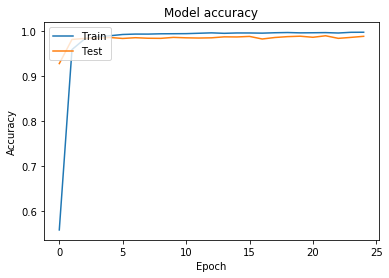

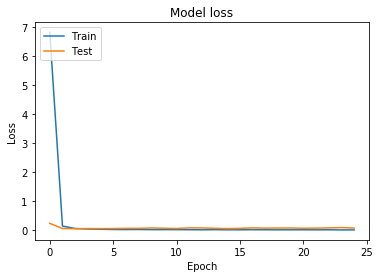

In [19]:
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

### With a different model and data augmentation

In [20]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Dropout(0.3))
model.add(layers.Flatten())
# model.add(layers.Dense(64, activation='relu'))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.1))
model.add(Dense(units=100, activation='relu'  ))
model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='softmax'))
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               57700     
__________

Epoch 1/5
2160/2160 [==============================] - 152s 71ms/step - loss: 0.1809 - acc: 0.9439 - val_loss: 0.3310 - val_acc: 0.9783
Epoch 2/5
2160/2160 [==============================] - 146s 67ms/step - loss: 0.0647 - acc: 0.9816 - val_loss: 0.2296 - val_acc: 0.9855
Epoch 3/5
2160/2160 [==============================] - 146s 68ms/step - loss: 0.0486 - acc: 0.9858 - val_loss: 0.2059 - val_acc: 0.9867
Epoch 4/5
2160/2160 [==============================] - 141s 65ms/step - loss: 0.0395 - acc: 0.9881 - val_loss: 0.2554 - val_acc: 0.9838loss: 0.039
Epoch 5/5
2160/2160 [==============================] - 133s 62ms/step - loss: 0.0325 - acc: 0.9907 - val_loss: 0.2322 - val_acc: 0.9850


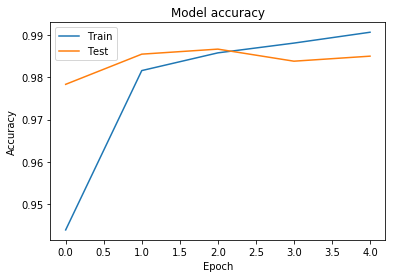

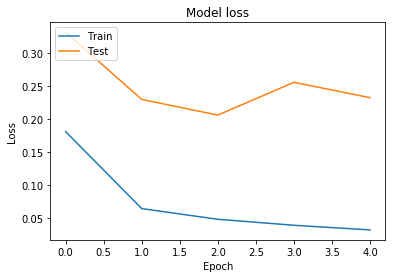

In [21]:
train_X_original = np.array(train_disp, copy=True) 
train_y_original = np.array(train_y, copy=True) 

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    )

datagen.fit(train_disp)

# Concatenating the old data with the augmented data
result_x  = np.concatenate((train_disp, train_X_original), axis=0)
result_y  = np.concatenate((train_y, train_y_original), axis=0)


# fits the model on batches with real-time data augmentation:
history = model.fit_generator(datagen.flow(result_x, result_y, batch_size=35),
                              steps_per_epoch=result_x.shape[0] / 35,
                              validation_data = (valid_disp, valid_y),
                              epochs=5)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [124]:
scores = model.evaluate(valid_disp, valid_y)
print(scores)

4200/4200 [==============================] - 2s 452us/step
[1.1490329504013062, 0.9276190476190476]


### Test model #3

Epoch 1/10
2160/2160 [==============================] - 134s 62ms/step - loss: 0.0294 - acc: 0.9915 - val_loss: 0.3136 - val_acc: 0.9798
Epoch 2/10
2160/2160 [==============================] - 142s 66ms/step - loss: 0.0279 - acc: 0.9915 - val_loss: 0.2865 - val_acc: 0.9817
Epoch 3/10
2160/2160 [==============================] - 144s 67ms/step - loss: 0.0250 - acc: 0.9929 - val_loss: 0.3551 - val_acc: 0.9774
Epoch 4/10
2160/2160 [==============================] - 143s 66ms/step - loss: 0.0238 - acc: 0.9931 - val_loss: 0.2896 - val_acc: 0.9819
Epoch 5/10
2160/2160 [==============================] - 136s 63ms/step - loss: 0.0219 - acc: 0.9934 - val_loss: 0.3087 - val_acc: 0.9805
Epoch 6/10
2160/2160 [==============================] - 128s 59ms/step - loss: 0.0214 - acc: 0.9942 - val_loss: 0.2438 - val_acc: 0.9840
Epoch 7/10
2160/2160 [==============================] - 139s 64ms/step - loss: 0.0184 - acc: 0.9949 - val_loss: 0.3573 - val_acc: 0.9769
Epoch 8/10
2160/2160 [===================

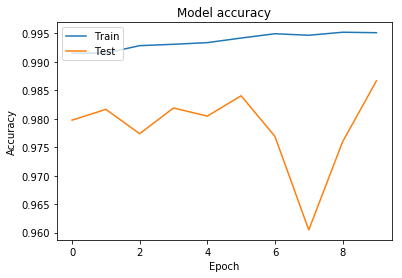

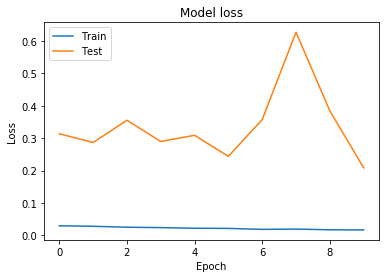

In [22]:
# test by changing epoch to 10
history = model.fit_generator(datagen.flow(result_x, result_y, batch_size=35),
                              steps_per_epoch=result_x.shape[0] / 35,
                              validation_data = (valid_disp, valid_y),
                              epochs=10)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Epoch 1/20
2160/2160 [==============================] - 139s 64ms/step - loss: 0.0153 - acc: 0.9958 - val_loss: 0.2970 - val_acc: 0.9812
Epoch 2/20
2160/2160 [==============================] - 146s 68ms/step - loss: 0.0142 - acc: 0.9959 - val_loss: 0.2157 - val_acc: 0.9864
Epoch 3/20
2160/2160 [==============================] - 163s 75ms/step - loss: 0.0170 - acc: 0.9953 - val_loss: 0.2757 - val_acc: 0.9824
Epoch 4/20
2160/2160 [==============================] - 171s 79ms/step - loss: 0.0139 - acc: 0.9960 - val_loss: 0.3524 - val_acc: 0.9774
Epoch 5/20
2160/2160 [==============================] - 154s 71ms/step - loss: 0.0158 - acc: 0.9956 - val_loss: 0.1747 - val_acc: 0.9886
Epoch 6/20
2160/2160 [==============================] - 151s 70ms/step - loss: 0.0133 - acc: 0.9965 - val_loss: 0.2320 - val_acc: 0.9852
Epoch 7/20
2160/2160 [==============================] - 156s 72ms/step - loss: 0.0121 - acc: 0.9967 - val_loss: 0.2380 - val_acc: 0.9852
Epoch 8/20
2160/2160 [===================

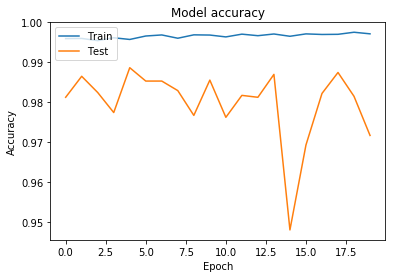

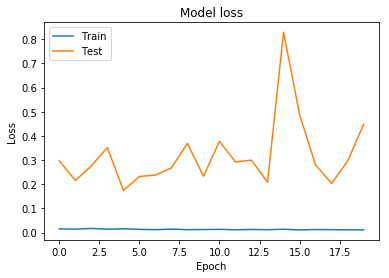

In [23]:
# test by changing epoch to 10
history = model.fit_generator(datagen.flow(result_x, result_y, batch_size=35),
                              steps_per_epoch=result_x.shape[0] / 35,
                              validation_data = (valid_disp, valid_y),
                              epochs=20)

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
scores = model.evaluate(valid_disp, valid_y)
print(scores)

4200/4200 [==============================] - 2s 500us/step
[0.4477679001353681, 0.9716666666666667]


## Predictions on test set

In [25]:
test_disp = np.array(test_df).reshape(-1, 28, 28, 1)

In [26]:
predictions = model.predict(test_disp)

In [27]:
results = np.argmax(predictions,axis = 1)

In [28]:
len(predictions)

28000

In [29]:
submission = pd.DataFrame({
        "ImageId" : list(range(1,28001)),
        "Label" : list(results)})
submission.to_csv("submission.csv",index=False)

In [30]:
submission.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [31]:
predictions_noaug = model.predict(test_disp)

In [32]:
results = np.argmax(predictions_noaug,axis = 1)

In [33]:
len(results)

28000

In [34]:
submission_2 = pd.DataFrame({
        "ImageId" : list(range(1,28001)),
        "Label" : list(results)})
submission_2.to_csv("submission_2.csv",index=False)